In [1]:
import pandas as pd

In [2]:
corpora_path = 'dialog-bAbI-tasks'

In [3]:
from gensim.models.word2vec import Word2Vec as w

w2v = w.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

Slow version of gensim.models.doc2vec is being used


In [3]:
vec_size = len(w2v['red']) 

vec_size

NameError: name 'w2v' is not defined

In [4]:
import os 

files = os.listdir(corpora_path)

files

['dialog-babi-task5-full-dialogs-trn.txt',
 'dialog-babi-task3-options-dev.txt',
 'dialog-babi-task2-API-refine-trn.txt',
 'dialog-babi-task3-options-trn.txt',
 'dialog-babi-task6-dstc2-tst.txt',
 'dialog-babi-task6-dstc2-trn.txt',
 'dialog-babi-task4-phone-address-trn.txt',
 'dialog-babi-task6-dstc2-candidates.txt',
 'dialog-babi-candidates.txt',
 'dialog-babi-task3-options-tst.txt',
 'dialog-babi-task4-phone-address-tst.txt',
 'dialog-babi-task4-phone-address-dev.txt',
 'dialog-babi-task1-API-calls-dev.txt',
 'dialog-babi-task2-API-refine-tst-OOV.txt',
 'dialog-babi-task3-options-tst-OOV.txt',
 'dialog-babi-task5-full-dialogs-tst-OOV.txt',
 'dialog-babi-task1-API-calls-trn.txt',
 'dialog-babi-kb-all.txt',
 'dialog-babi-task1-API-calls-tst.txt',
 'dialog-babi-task1-API-calls-tst-OOV.txt',
 'dialog-babi-task2-API-refine-dev.txt',
 'dialog-babi-task4-phone-address-tst-OOV.txt',
 'dialog-babi-task2-API-refine-tst.txt',
 'dialog-babi-task6-dstc2-dev.txt',
 'dialog-babi-task5-full-dialogs-

In [20]:
data_dict = dict()

for f in files:
    if 'candidates' in f: continue
    data_dict[f] = pd.read_csv(os.path.join(corpora_path, f), names=['text','bot'], delimiter='\t')

In [21]:
task = 'task6'

task_data = [x for x in data_dict if task in x]

task_data

['dialog-babi-task6-dstc2-trn.txt',
 'dialog-babi-task6-dstc2-tst.txt',
 'dialog-babi-task6-dstc2-dev.txt']

In [22]:
train_data = data_dict[[x for x in task_data if 'trn' in x][0]]
dev_data = data_dict[[x for x in task_data if 'dev' in x][0]]
test_data = data_dict[[x for x in task_data if 'tst' in x][0]]

train_data['o'] = 'trn'
dev_data['o'] = 'dev'
test_data['o'] = 'tst'

c = pd.concat((train_data, dev_data, test_data))
c.index = range(len(c))



#c = c[~c['text'].str.contains("<SILENCE>")] # get rid of <SILENCE> markers

c = c.fillna("<unk>")
c['ind'] = c.text.map(lambda x: x.split()[0]) # split out the index into another column
c['text'] = c.text.map(lambda x: x.split()[1:])

# I hate this
gid = []
j = 1
for i in c.ind:
    if i == '1': j+=1
    gid.append(j)

c['gid'] = gid

mask = []
has_api_call = 'True'
for i,r in c.iterrows():
    if r.ind == '1': has_api_call = 'True'
    if "api_call" in r.bot: 
        mask += ['True']
        has_api_call = 'False'
        continue
    mask += [has_api_call]
c['mask'] = mask
#c = c.drop(['ind'],axis=1)


In [23]:
d = c.copy()

In [24]:
c[:100]

,text,bot,o,ind,gid,mask
0,[<SILENCE>],"Hello , welcome to the Cambridge restaurant sy...",trn,1,2,True
1,"[i, want, a, moderately, priced, restaurant, i...",api_call R_cuisine west moderate,trn,2,2,True
2,"[saint_johns_chop_house, R_post_code, saint_jo...",<unk>,trn,3,2,False
3,"[saint_johns_chop_house, R_cuisine, british]",<unk>,trn,4,2,False
4,"[saint_johns_chop_house, R_location, west]",<unk>,trn,5,2,False
5,"[saint_johns_chop_house, R_phone, saint_johns_...",<unk>,trn,6,2,False
6,"[saint_johns_chop_house, R_address, saint_john...",<unk>,trn,7,2,False
7,"[saint_johns_chop_house, R_price, moderate]",<unk>,trn,8,2,False
8,"[saint_johns_chop_house, R_rating, 3]",<unk>,trn,9,2,False
9,"[prezzo, R_post_code, prezzo_post_code]",<unk>,trn,10,2,False


## Find all possible entities and their attributes

In [25]:
restaurants = c[c.bot.str.contains('<unk>')]
restaurants = restaurants.text.apply(lambda x: pd.Series(x))
restaurants.columns = ['rname', 'attr_key', 'attr_value' ]
restaurans = restaurants.drop_duplicates()
restaurants = restaurants[restaurants.rname != 'api_key']
restaurants = restaurants[restaurants.rname != 'ask']
restaurants = restaurants[restaurants.attr_key != 'no']

attrs = ['R_cuisine', 'R_location', 'R_price']



restaurants = restaurants[restaurants.attr_key.isin(attrs)]

restaurants.to_pickle('restaurants_props.pkl')


"number of restaurants:", len(set(restaurants.rname))

('number of restaurants:', 104)

In [123]:
restaurants[restaurants.rname == 'cote']

,rname,attr_key,attr_value
2126,cote,R_cuisine,french
2127,cote,R_location,centre
2130,cote,R_price,expensive
2262,cote,R_cuisine,french
2263,cote,R_location,centre
2266,cote,R_price,expensive
2461,cote,R_cuisine,french
2462,cote,R_location,centre
2465,cote,R_price,expensive
3869,cote,R_cuisine,french


In [11]:
cols = list(set(restaurants.attr_key))
r = restaurants.pivot_table('attr_value', ['rname'], 'attr_key', aggfunc=lambda x: list(set(x))[0])
r = pd.get_dummies(data = r, columns = cols )
r['rname'] = r.index
c = r.columns.tolist()
c.insert(0, c.pop(c.index('rname')))
r = r.reindex(columns= c)

r.to_pickle('restaurants.pkl')

r[:10]

,rname,R_cuisine_african,R_cuisine_asian_oriental,R_cuisine_bistro,R_cuisine_british,R_cuisine_chinese,R_cuisine_european,R_cuisine_french,R_cuisine_fusion,R_cuisine_gastropub,...,R_cuisine_turkish,R_cuisine_vietnamese,R_price_cheap,R_price_expensive,R_price_moderate,R_location_centre,R_location_east,R_location_north,R_location_south,R_location_west
rname,,,,,,,,,,,,,,,,,,,,,
ali_baba,ali_baba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
anatolia,anatolia,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
backstreet_bistro,backstreet_bistro,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
bangkok_city,bangkok_city,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
bedouin,bedouin,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
bloomsbury_restaurant,bloomsbury_restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
caffe_uno,caffe_uno,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
cambridge_lodge_restaurant,cambridge_lodge_restaurant,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
charlie_chan,charlie_chan,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [12]:
restaurants = r
restaurants[:10]

,rname,R_cuisine_african,R_cuisine_asian_oriental,R_cuisine_bistro,R_cuisine_british,R_cuisine_chinese,R_cuisine_european,R_cuisine_french,R_cuisine_fusion,R_cuisine_gastropub,...,R_cuisine_turkish,R_cuisine_vietnamese,R_price_cheap,R_price_expensive,R_price_moderate,R_location_centre,R_location_east,R_location_north,R_location_south,R_location_west
rname,,,,,,,,,,,,,,,,,,,,,
ali_baba,ali_baba,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
anatolia,anatolia,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
backstreet_bistro,backstreet_bistro,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
bangkok_city,bangkok_city,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
bedouin,bedouin,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
bloomsbury_restaurant,bloomsbury_restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
caffe_uno,caffe_uno,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
cambridge_lodge_restaurant,cambridge_lodge_restaurant,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
charlie_chan,charlie_chan,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## Find the suggesed restaurants

In [13]:
c = d.copy()

In [14]:
suggested = c[c.text.apply(str).str.contains('<SILENCE>') | c.text.apply(str).str.contains('api_call')]
suggested.loc[suggested.text.apply(str).str.contains('api_call'), 'bot'] = "no_result"
print(len(suggested[suggested.bot == 'no_result']))

suggested['target'] = suggested.bot.map(lambda x: x.split()[0])
possible_targets = list(set(restaurants.rname)) + ['no_result']

suggested = suggested[suggested.target.isin(possible_targets)]
#suggested = suggested[~suggested.bot.str.contains('api_call')]

suggested.drop(['text','bot', 'ind', 'mask'], axis=1, inplace=True)


# dropping duplicates means we only care about the first api_call in the dialogue
suggested = suggested.drop_duplicates(subset=['o','gid'])

len(suggested)

462


/home/casey/.local/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/casey/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


3026

In [15]:
suggested

,o,gid,target
16,trn,2,prezzo
24,trn,3,no_result
34,trn,4,no_result
136,trn,5,michaelhouse_cafe
228,trn,6,the_nirala
467,trn,8,the_missing_sock
498,trn,9,no_result
710,trn,10,riverside_brasserie
936,trn,11,da_vinci_pizzeria
948,trn,12,the_lucky_star


## Get the previous X utts, link with suggestion

In [16]:
c = d.copy()

In [17]:
import numpy as np

c = c[~c.text.apply(str).str.contains('<SILENCE>')]
c = c[~c.bot.apply(str).str.contains('<unk>')]
c.loc[~c.bot.apply(str).str.contains('api_call'), 'bot'] = ""

# need a bit of discoures history
#c['text1'] = c.text.shift(1)
#c['text2'] = c.text.shift(2)
#c['text3'] = c.text.shift(3)
#c.dropna(subset=['text', 'text1'], inplace=True)

#c['text'] = c.text2.map(list) + c.text1.map(list) + c.text.map(list)
#c['text'] = c.text1.map(list) + c.text.map(list)
#c.drop(['text1'], axis=1, inplace=True)

# dropping duplicates means we only care about the first api_call in the dialogue
#c = c.drop_duplicates(subset=['o','gid'])


#

#c = pd.merge(c, suggested, on=['o','gid'], how='left')

c = c[c['mask'].str.contains('True')]
c = c.groupby('gid').agg(sum)
c = c[c['mask'] == 'True']
c['gid'] = c.index
c = pd.merge(c, suggested, on=['o','gid'], how='left')



c.dropna(inplace=True)
len(c)

414

In [18]:
c.to_pickle('utts_refs.pkl')

In [19]:
c[:5]

,text,bot,o,ind,mask,gid,target
0,"[i, want, a, moderately, priced, restaurant, i...",api_call R_cuisine west moderate,trn,2,True,2,prezzo
2,"[cheap, restaurant, in, the, north, part, of, ...",api_call R_cuisine north cheap,trn,2,True,11,da_vinci_pizzeria
3,"[cheap, restaurant, in, the, south, part, of, ...",api_call R_cuisine south cheap,trn,2,True,12,the_lucky_star
4,"[cheap, restaurant, serving, indian, food]",api_call indian R_location cheap,trn,2,True,15,the_gandhi
5,"[thai, food]",api_call thai R_location R_price,trn,2,True,22,bangkok_city


## Grab only the utts where there is an api_call

In [133]:


# make the text (which is a list of words) into a single column of words
s = c.text.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
s.name = 'word'
c = c.drop('text', axis=1).join(s)
c.dropna(subset=['bot'], inplace=True)


#c['w2v'] = c.text.map(lambda x: [w2v[i] for i in x if i in w2v])
c = c[~c.word.apply(str).str.contains('_')]
c['w2v'] = c.word.map(lambda x: w2v[x] if x in w2v else np.zeros(vec_size))
attr_df = c.bot.apply(lambda x: pd.Series(x.split()))
c['type'], c['loc'], c['price'] = attr_df[1], attr_df[2], attr_df[3]
c = pd.get_dummies(data = c, columns = ['type','loc','price'] )
    
data = c

len(data)

3783

In [134]:
train_data = data[data.o == 'trn'].drop(['o'], axis=1)
dev_data = data[data.o == 'dev'].drop(['o'], axis=1)
test_data = data[data.o == 'tst'].drop(['o'], axis=1)

train_data.shape, test_data.shape, dev_data.shape

((2138, 47), (401, 47), (1244, 47))

In [135]:
train_data[:3]

,bot,ind,mask,gid,target,word,w2v,type_R_cuisine,type_african,type_austrian,...,type_vietnamese,loc_R_location,loc_east,loc_north,loc_south,loc_west,price_R_price,price_cheap,price_expensive,price_moderate
0,api_call R_cuisine west moderate,2,True,2,prezzo,i,"[-0.225586, -0.0195312, 0.0908203, 0.237305, -...",1,0,0,...,0,0,0,0,0,1,0,0,0,1
0,api_call R_cuisine west moderate,2,True,2,prezzo,want,"[0.136719, 0.148438, 0.114746, 0.0698242, -0.1...",1,0,0,...,0,0,0,0,0,1,0,0,0,1
0,api_call R_cuisine west moderate,2,True,2,prezzo,a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,...,0,0,0,0,0,1,0,0,0,1


## Train

In [136]:
start_col = 'type_R_cuisine'

In [137]:
import numpy as np

y_train = train_data.ix[:,start_col:].as_matrix() 

X_train = train_data.w2v.as_matrix()
X_train = np.array(list(X_train), dtype=np.float) # needed to fit the regression model

X_train.shape, y_train.shape

((2138, 300), (2138, 40))

In [138]:
from sklearn.linear_model import *
import numpy as np


model = Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.01)

model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.01)

## Test: How well can it predict the 3 usual attributes?

In [139]:
# word level composition
def compute_target(utt):
    predictions = [model.predict(w.reshape(1,-1))[0] for w in utt.w2v]
    return compose(predictions)

In [140]:
#
# composition by union of vectors
#
def compose(predictions):
    p = predictions[0]
    for i in predictions[1:]:
        p = np.logical_or(i, p)
    return p

In [141]:
# attribute level composition
def compute_target(utt):
    predictions = utt.w2v.values
    p = compose(predictions)
    return model.predict(p.reshape(1,-1))

In [142]:
#
#  this is the composition function, it just sums vectors
#
def compose(predictions):
    p = predictions[0]
    for i in predictions[1:]:
        p = np.sum((i, p),axis=0)
    return p

In [143]:
targets = train_data.drop(['bot','word','w2v', 'target', 'gid','mask','ind'], 1)
targets = targets.drop_duplicates()
#targets = targets.ix[:,start_col:].as_matrix() 

train_data.shape, targets.shape

targets[:10]

,type_R_cuisine,type_african,type_austrian,type_british,type_canapes,type_cantonese,type_catalan,type_chinese,type_cuban,type_european,...,type_vietnamese,loc_R_location,loc_east,loc_north,loc_south,loc_west,price_R_price,price_cheap,price_expensive,price_moderate
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [144]:
import operator
import scipy
import sklearn

eval_data = dev_data
gold=[]
guess=[]

indeces = list(set(eval_data.index))
print('num instances', len(indeces))

for eid in indeces:
    sub = eval_data[eval_data.index == eid] # grab the RE for this scene
    target = compute_target(sub) # compose the predictions of each word to a target vector
    distances = [(v, scipy.spatial.distance.cosine(target,v.ix[start_col:])) for i,v in targets.iterrows()]
    guess += [min(distances, key=operator.itemgetter(1))[0]] # which object has the shortest distance?
    gold += [sub.iloc[-1].ix[start_col:]] # all the rows in sub have the same matrix


num instances 128


/home/casey/.local/lib/python3.5/site-packages/scipy/spatial/distance.py:326: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


In [145]:
#
guess=np.array(guess,dtype=np.float)
gold=np.array(gold,dtype=np.float)

sklearn.metrics.f1_score(gold, guess, average='micro', labels=np.array([0,1],dtype=np.float))

0.89322916666666663

## Incremental Evaluation

In [146]:
from collections import defaultdict as dd

incr_results = dd(list)
filled_slots = dd(list)

for eid in indeces:
    pre_sub = eval_data[eval_data.index == eid] # grab the RE for this scene
    for i in range(1,len(pre_sub)):
        sub = pre_sub[:i]
        gold=[]
        guess=[]
        target = compute_target(sub) # compose the predictions of each word to a target vector
        distances = [(v, scipy.spatial.distance.cosine(target,v.ix[start_col:])) for i,v in targets.iterrows()]
        guess += [min(distances, key=operator.itemgetter(1))[0]] # which object has the shortest distance?
        gold += [sub.iloc[-1].ix[start_col:]] # all the rows in sub have the same matrix
        filled_slots[i].append(np.sum(guess))
        guess=np.array(guess,dtype=np.float)
        gold=np.array(gold,dtype=np.float)
        incr_results[i].append(sklearn.metrics.f1_score(gold, guess, average='micro', labels=np.array([0,1],dtype=np.float)))

/home/casey/.local/lib/python3.5/site-packages/scipy/spatial/distance.py:326: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


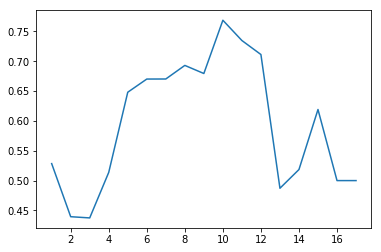

In [147]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

results = [(i,np.mean(incr_results[i])) for i in incr_results]

r = list(zip(*results))

plt.plot(r[0], r[1])

### Test: How well can it predict the restaurant using all of a restaurant's attributes? 

In [148]:
rdata = data[['ind','gid','target','word','w2v','o']]

In [149]:
rdata[:10]

,ind,gid,target,word,w2v,o
0,2,2,prezzo,i,"[-0.225586, -0.0195312, 0.0908203, 0.237305, -...",trn
0,2,2,prezzo,want,"[0.136719, 0.148438, 0.114746, 0.0698242, -0.1...",trn
0,2,2,prezzo,a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",trn
0,2,2,prezzo,moderately,"[0.145508, 0.0294189, -0.289062, 0.279297, 0.0...",trn
0,2,2,prezzo,priced,"[-0.0708008, 0.128906, -0.324219, 0.205078, -0...",trn
0,2,2,prezzo,restaurant,"[-0.148438, -0.124023, 0.0412598, 0.208984, -0...",trn
0,2,2,prezzo,in,"[0.0703125, 0.0869141, 0.0878906, 0.0625, 0.06...",trn
0,2,2,prezzo,the,"[0.0800781, 0.10498, 0.0498047, 0.0534668, -0....",trn
0,2,2,prezzo,west,"[-0.0927734, -0.12207, 0.140625, -0.0649414, 0...",trn
0,2,2,prezzo,part,"[0.0071106, 0.0563965, 0.0106812, 0.0825195, -...",trn


In [150]:
restaurants[:5]

,rname,R_price_cheap,R_price_expensive,R_price_moderate,R_location_centre,R_location_east,R_location_north,R_location_south,R_location_west,R_cuisine_african,...,R_cuisine_lebanese,R_cuisine_mediterranean,R_cuisine_mexican,R_cuisine_north_american,R_cuisine_portuguese,R_cuisine_seafood,R_cuisine_spanish,R_cuisine_thai,R_cuisine_turkish,R_cuisine_vietnamese
rname,,,,,,,,,,,,,,,,,,,,,
ali_baba,ali_baba,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
anatolia,anatolia,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
backstreet_bistro,backstreet_bistro,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bangkok_city,bangkok_city,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
bedouin,bedouin,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [158]:
num_cols = len(restaurants.columns) -1
start_col = 'R_price_cheap'
num_cols

32

In [159]:
rdata = rdata[rdata.target.isin(restaurants.rname)]
rdata['attrvec'] = np.array(rdata.target.map(lambda x: np.array(restaurants[restaurants.rname == x].ix[0:,start_col:].as_matrix()[0])))


In [160]:
rdata[:5]

,ind,gid,target,word,w2v,o,attrvec
0,2,2,prezzo,i,"[-0.225586, -0.0195312, 0.0908203, 0.237305, -...",trn,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
0,2,2,prezzo,want,"[0.136719, 0.148438, 0.114746, 0.0698242, -0.1...",trn,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
0,2,2,prezzo,a,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",trn,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
0,2,2,prezzo,moderately,"[0.145508, 0.0294189, -0.289062, 0.279297, 0.0...",trn,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
0,2,2,prezzo,priced,"[-0.0708008, 0.128906, -0.324219, 0.205078, -0...",trn,"[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [161]:
train_data = rdata[rdata.o == 'trn'].drop(['o'], axis=1)
dev_data = rdata[rdata.o == 'dev'].drop(['o'], axis=1)
test_data = rdata[rdata.o == 'tst'].drop(['o'], axis=1)

train_data.shape, test_data.shape, dev_data.shape

((2006, 6), (395, 6), (1175, 6))

In [162]:
import numpy as np

y_train = [x for x in train_data.attrvec] # this shold just work with as_matri(), but the shape is always wrong

X_train = train_data.w2v.as_matrix()
X_train = np.array(list(X_train), dtype=np.float) # needed to fit the regression model

X_train.shape

(2006, 300)

In [163]:
from sklearn.linear_model import *
import numpy as np


model = Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.01)

model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.01)

In [164]:
def compute_mrr(lst, target):
    i = 1.0
    for l in lst:
        if l == target: break
        i+=1
    return 1.0/i

In [165]:
import operator
import scipy
import sklearn

eval_data = dev_data
gold=[]
guess=[]

indeces = list(set(eval_data.index))
print('num instances', len(indeces))
mrr = 0.0
for eid in indeces:
    sub = rdata[rdata.index == eid] # grab the RE for this scene
    target = compute_target(sub) # compose the predictions of each word to a target vector
    distances = [(v['rname'], scipy.spatial.distance.cosine(target,v.ix[start_col:])) for i,v in restaurants.iterrows()]
    distances.sort(key=operator.itemgetter(1))
    guess += [distances[0][0]]
    d = list(zip(*distances))[0]
    mrr += compute_mrr(d, sub.iloc[-1].ix['target'])
    gold += [sub.iloc[-1].ix['target']] # all the rows in sub have the same matrix
    


num instances 119


In [166]:
sklearn.metrics.accuracy_score(gold, guess)

0.47058823529411764

In [167]:
mrr / len(gold)

0.6229480614059901

## Find the restaurant incrementally

In [168]:
import operator
import scipy
import sklearn

eval_data = dev_data
gold=[]
guess=[]

indeces = list(set(eval_data.index))
print('num instances', len(indeces))
mrr = 0.0
for eid in indeces:
    pre_sub = rdata[rdata.index == eid] # grab the RE for this scene
    for i in range(1,len(pre_sub)):
        sub = pre_sub[:i]
        gold = []
        guess = []
        target = compute_target(sub) # compose the predictions of each word to a target vector
        distances = [(v['rname'], scipy.spatial.distance.cosine(target,v.ix[start_col:])) for i,v in restaurants.iterrows()]
        distances.sort(key=operator.itemgetter(1))
        guess += [distances[0][0]]
        d = list(zip(*distances))[0]
        mrr += compute_mrr(d, sub.iloc[-1].ix['target'])
        gold += [sub.iloc[-1].ix['target']] # all the rows in sub have the same matrix
        incr_results[i].append(sklearn.metrics.accuracy_score(gold, guess))

num instances 119


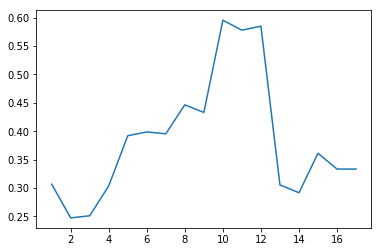

In [169]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

results = [(i,np.mean(incr_results[i])) for i in incr_results]

r = list(zip(*results))

plt.plot(r[0], r[1])

## First closest word instead

In [170]:
#eval_data['w2v'] = eval_data.word.map(lambda x: w2v[w2v.most_similar([x], topn=1)[0][0]] if x in w2v else np.zeros(vec_size))

In [171]:
# this returns it back to normal:
#eval_data['w2v'] = eval_data.word.map(lambda x: w2v[x] if x in w2v else np.zeros(vec_size))

In [172]:
import pickle
# now you can save it to a file
with open('ridge_restaurant.pkl', 'wb') as f:
    pickle.dump(model, f)